# P2 Exercice 1

from [https://openclassrooms.com/fr/courses/4011851-initiez-vous-au-machine-learning/6785036-entrainez-vous-a-entrainer-un-algorithme-de-machine-learning]()



In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [50]:
df = pd.read_csv('input/house_data.csv')

In [51]:
df.head()

,price,surface,arrondissement
0,1820,46.1,1.0
1,1750,41.0,1.0
2,1900,55.0,1.0
3,1950,46.0,1.0
4,1950,49.0,1.0


In [52]:
df.shape

(827, 3)

In [53]:
df.describe()

,price,surface,arrondissement
count,827.000000,822.000000,822.000000
mean,2007.342201,58.045925,4.142336
std,1890.894229,44.827522,3.202151
min,390.000000,10.000000,1.000000
25%,1050.000000,28.655000,2.000000
50%,1567.000000,46.100000,3.000000
75%,2346.000000,73.000000,4.000000
max,25000.000000,415.000000,10.000000


Remove empty values

In [54]:
df.isna().value_counts()

price  surface  arrondissement
False  False    False             822
       True     True                5
dtype: int64

Only 5 N/A can be dropped

In [55]:
df.dropna(inplace=True)
df.isna().value_counts()

price  surface  arrondissement
False  False    False             822
dtype: int64

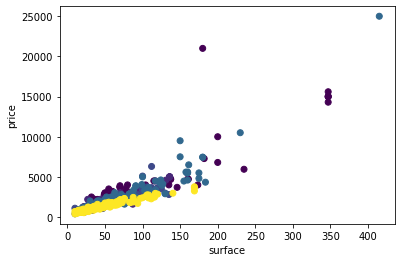

In [56]:
plt.xlabel('surface')
plt.ylabel('price')
plt.scatter(df['surface'], df['price'], c=df['arrondissement'])
plt.show()

Remove outliers

In [57]:
df[df['price'] > 8000]

,price,surface,arrondissement
47,14300,347.0,1.0
48,15000,347.0,1.0
123,10000,200.0,1.0
134,15000,347.0,1.0
141,15000,347.0,1.0
142,21000,180.0,1.0
151,15600,347.0,1.0
559,9500,150.0,4.0
600,25000,415.0,4.0
648,10500,230.0,4.0


In [58]:
df = df[df['price'] < 8000]

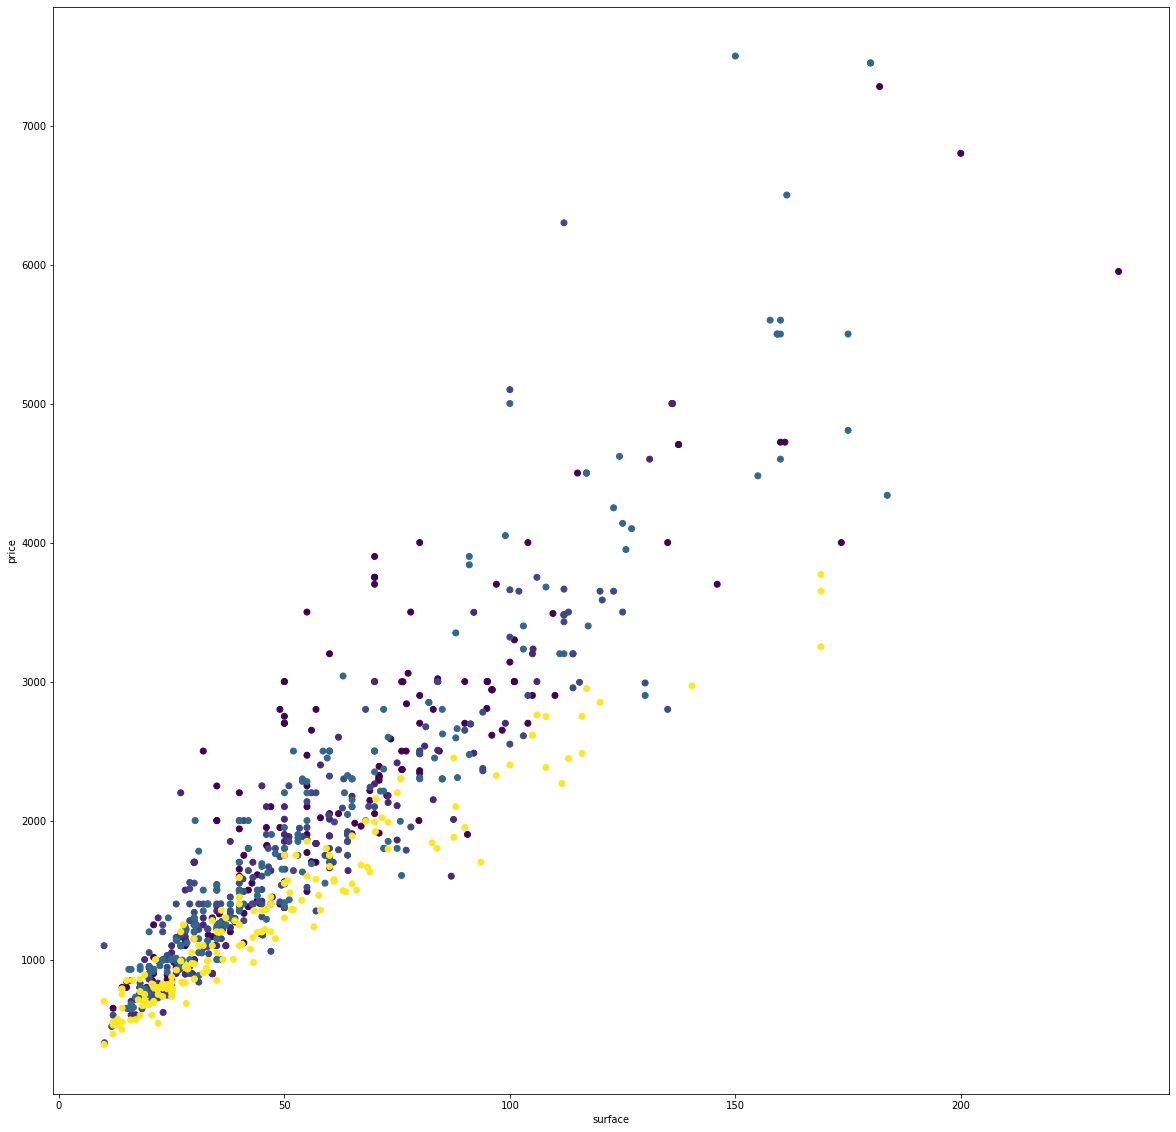

In [59]:
plt.figure(figsize=(20,20))
plt.xlabel('surface')
plt.ylabel('price')
plt.scatter(df['surface'], df['price'], c=df['arrondissement'])
plt.show()

In [12]:
X = df[{'surface', 'arrondissement'}]
y = df['price']

In [13]:
X.shape

(812, 2)

In [14]:
y = y.values.reshape(-1, 1)
y.shape

(812, 1)

In [15]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [16]:
model.score(X, y)

0.8512536952533125

In [17]:
model.coef_

array([[-49.58771717,  28.03580519]])

In [18]:
type(X)

pandas.core.frame.DataFrame

In [19]:
X.iloc[(0,)]

arrondissement     1.0
surface           46.1
Name: 0, dtype: float64

In [20]:
y[0]

array([1820])

Does a linear regression on 2 features is ok ? or should we create several regressions for each 'arrondissement' ?

In [30]:
model.predict(pd.DataFrame(
    [(1, 46.1), (2, 50)],
    columns=('arrondissement', 'surface')
))

array([[1751.93532023],
       [1811.68724331]])

In [43]:
df[{'surface', 'arrondissement'}]

,arrondissement,surface
0,1.0,46.10
1,1.0,41.00
2,1.0,55.00
3,1.0,46.00
4,1.0,49.00
...,...,...
822,10.0,35.00
823,10.0,10.00
824,10.0,34.00
825,10.0,65.00


In [44]:
df[['surface', 'arrondissement']]

,surface,arrondissement
0,46.10,1.0
1,41.00,1.0
2,55.00,1.0
3,46.00,1.0
4,49.00,1.0
...,...,...
822,35.00,10.0
823,10.00,10.0
824,34.00,10.0
825,65.00,10.0


In [60]:
X_train, X_test, y_train, y_test = train_test_split(df[['surface', 'arrondissement']], df['price'], test_size=0.2)

In [62]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [66]:
model.score(X_test, y_test)

0.8558289032697086

In [67]:
model.rank_

2

# APPENDIX


## tests manipulate shapes of array, series, DF

In [22]:
a = pd.Series([1,2,3,4])

In [23]:
a.shape

(4,)

In [24]:
a.values.reshape(2, 2)

array([[1, 2],
       [3, 4]])

In [25]:
a

0    1
1    2
2    3
3    4
dtype: int64

## Play with dataframes and index 

[https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html]()

In [26]:
df = pd.DataFrame([('bird', 389.0),
                   ('bird', 24.0),
                   ('mammal', 80.5),
                   ('mammal', np.nan)],
                  index=['falcon', 'parrot', 'lion', 'monkey'],
                  columns=('class', 'max_speed'))
df

,class,max_speed
falcon,bird,389.0
parrot,bird,24.0
lion,mammal,80.5
monkey,mammal,NaN


In [27]:
# When we reset the index, the old index is added as a column, and a new sequential index is used:
df.reset_index()

,index,class,max_speed
0,falcon,bird,389.0
1,parrot,bird,24.0
2,lion,mammal,80.5
3,monkey,mammal,NaN


In [28]:
# We can use the drop parameter to avoid the old index being added as a column:
df.reset_index(drop=True)

,class,max_speed
0,bird,389.0
1,bird,24.0
2,mammal,80.5
3,mammal,NaN
